In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

from transformer.infer import SentenceEmbedder

from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Examples: Sample codes to determine cosine similarity of a brand/object with certain categories

In [2]:
# Initialize SentenceEmbedder with the model name
embedder = SentenceEmbedder("model")

# Sentences we want sentence embeddings for
query_sentence = ["Oppo"]

# Query sentence
options = ["Food", "mobile", "cars"]

# Get the most similar sentences to the query sentence
similar_sentences = embedder.compare_sentence_embeddings(query_sentence, options)

# Print most similar sentences
print("Most similar sentences to '{}':".format(query_sentence))
for sentence, similarity in similar_sentences:
    print("- {} (Cosine similarity: {})".format(sentence, similarity))

Most similar sentences to '['Oppo']':
- mobile (Cosine similarity: 0.26489371061325073)
- cars (Cosine similarity: 0.20265454053878784)
- Food (Cosine similarity: 0.19341111183166504)


In [3]:
# Initialize SentenceEmbedder with the model name
embedder = SentenceEmbedder("model")

# Sentences we want sentence embeddings for
query_sentence = ["adult"]

# Query sentence
options = ["animal", "porn", "rabbit", 'human']

# Get the most similar sentences to the query sentence
similar_sentences = embedder.compare_sentence_embeddings(query_sentence, options)

# Print most similar sentences
print("Most similar sentences to '{}':".format(query_sentence))
for sentence, similarity in similar_sentences:
    print("- {} (Cosine similarity: {})".format(sentence, similarity))


Most similar sentences to '['adult']':
- human (Cosine similarity: 0.5100370645523071)
- porn (Cosine similarity: 0.3703511953353882)
- rabbit (Cosine similarity: 0.3444550335407257)
- animal (Cosine similarity: 0.3385153114795685)


### Run Transformer Model

**Choose the transformer model**  

**model**  
**bert-base-uncased**  
**yiyanghkust/finbert-esg-9-categories**

In [5]:
model = "model" 

In [6]:
embedder = SentenceEmbedder(model)

### Get Domains and Categories

In [7]:
with open('domain_names_ChatGPT.txt', 'r') as f:
    domain_names = f.readlines()
    domain_names = [domain.strip() for domain in domain_names]

with open('domain_names_ChatGPT_categories.txt', 'r') as f:
    domain_cats = f.readlines()
    domain_cats = [domain_cat.strip() for domain_cat in domain_cats]

domain_names[:5], domain_cats[:5]

(['google', 'kzhi', 'zemanta', 'shalltry', 'tiktokcdn'],
 ['Search Engines',
  'Social Media',
  'Streaming Services',
  'Cloud Storage',
  'Online Shopping'])

### Example: Find the most similar category(s) for a specific domain name.

In [8]:
def get_match(domain='youtube',cats=['a','b','c']):
    query_sentence = [domain]

    # Query sentence
    options = cats

    # Get the most similar sentences to the query sentence
    similar_sentences = embedder.compare_sentence_embeddings(query_sentence, options)
    return similar_sentences[:5]

In [9]:
domains = ['hulu', 'xhamster', 'slack', 'spotify', 'facebook', 'icloud', 'redtube', 'shazam']
print("Model used = ", model, '\n')
for domain in domains:
    print(domain, get_match(domain=domain,cats=domain_cats), end = '\n\n')

Model used =  model 

hulu [('Streaming Services', 0.40834665298461914), ('Porn', 0.3623799979686737), ('Social Media', 0.33528193831443787), ('Online Shopping', 0.2578137516975403), ('Email Services', 0.20266659557819366)]

xhamster [('Porn', 0.22827106714248657), ('Streaming Services', 0.1722278594970703), ('Online Shopping', 0.16416221857070923), ('Social Media', 0.14755739271640778), ('Search Engines', 0.11880040168762207)]

slack [('Social Media', 0.30759939551353455), ('Collaboration & Productivity', 0.2718050479888916), ('Streaming Services', 0.24194975197315216), ('Porn', 0.19970673322677612), ('Email Services', 0.1803300380706787)]

spotify [('Streaming Services', 0.40139904618263245), ('Social Media', 0.33443382382392883), ('Cloud Storage', 0.2936389744281769), ('Porn', 0.27082377672195435), ('Online Shopping', 0.23364004492759705)]

facebook [('Social Media', 0.7339053750038147), ('Porn', 0.4959312081336975), ('Search Engines', 0.41024908423423767), ('Streaming Services', 0.

### Goal:
#### Generate a scatter plot to identify if similar domains cluster together after generating embeddings of each domain

In [10]:
model

'model'

In [11]:
embeddings = {}
for domain in domain_names:
    embeddings[domain] = embedder.get_sentence_embeddings(domain).numpy().flatten()

In [12]:
len(embeddings['google'])

384

In [21]:
domain_embeddings_df = (pd.DataFrame(embeddings)).T
domain_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
google,-0.042198,-0.013703,-0.003412,0.011719,-0.040670,-0.019910,0.017737,0.066316,-0.051226,0.024120,...,0.027683,-0.048211,-0.001320,-0.032459,-0.018035,0.055170,0.068408,0.063787,0.036423,0.045929
kzhi,-0.058460,-0.008728,-0.046694,-0.027711,-0.096549,-0.016162,0.086568,0.002412,-0.016929,-0.045402,...,-0.035600,0.002959,-0.016714,0.050349,-0.016266,-0.046722,0.091670,0.016283,0.004126,-0.024325
zemanta,-0.052520,0.110893,-0.083588,0.005604,-0.061638,-0.112630,0.108178,-0.009872,-0.005185,0.043872,...,0.072502,-0.028989,-0.032118,0.029446,-0.050425,0.008384,0.138989,0.021803,0.004635,0.020527
shalltry,0.001893,0.049512,-0.015935,-0.042520,0.001139,0.019734,0.013495,0.002136,0.006596,-0.014402,...,0.046595,0.092506,-0.013790,0.011767,-0.033352,0.032640,0.043021,-0.075949,-0.011792,-0.044670
tiktokcdn,-0.150298,0.016115,-0.055033,-0.059108,-0.063477,-0.027779,0.094355,0.059335,0.006427,-0.003461,...,0.066014,0.010278,-0.010999,0.013710,-0.089661,0.114624,-0.017614,0.037956,-0.003247,0.015974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brazzers,-0.050660,-0.010195,-0.020236,0.011138,-0.053691,-0.027021,0.114914,0.034476,-0.019826,-0.048691,...,0.087345,-0.001602,-0.000368,0.035042,-0.011528,0.082377,0.102569,-0.019001,0.018640,-0.076715
xnxx,-0.059062,-0.057905,0.020420,-0.054729,0.000619,-0.017669,0.128151,-0.003639,-0.004139,-0.013831,...,0.044274,0.053556,-0.022181,0.050732,-0.065183,0.062753,0.027429,0.030690,-0.053254,-0.017442
runbox,0.097997,0.012552,-0.008454,0.035214,0.015118,0.042196,-0.025706,0.054242,-0.005013,-0.056161,...,0.081989,-0.043945,0.019187,0.012960,-0.000086,0.103987,-0.037102,0.052149,0.029287,0.017481
posteo,-0.075149,0.045807,-0.032930,-0.033898,-0.077193,-0.010826,0.103240,0.065628,-0.004727,-0.054175,...,0.067509,-0.014716,-0.012805,0.053535,-0.048199,0.019388,0.105210,0.024743,0.009368,-0.007553


In [23]:
domain_embeddings_df.columns = domain_embeddings_df.columns.astype(str)

### Reduce dimensions to 2 for easier visualization

#### Using T-SNE

In [24]:
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(domain_embeddings_df)

In [25]:
data_tsne.shape

(104, 2)

#### Using PCA

In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(domain_embeddings_df)

In [27]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)

In [28]:
data_pca = pd.DataFrame(reduced_df, columns=['PC1', 'PC2']).to_numpy()
data_pca.shape

(104, 2)

### Clustering with T-SNE/PCA

In [29]:
n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(data_tsne) # Pass the t-sne of pca numpy array here

C:\Users\SafyanMemon\anaconda3\envs\hugging_face\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SafyanMemon\anaconda3\envs\hugging_face\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
domain_embeddings_df['Cluster'] = clusters

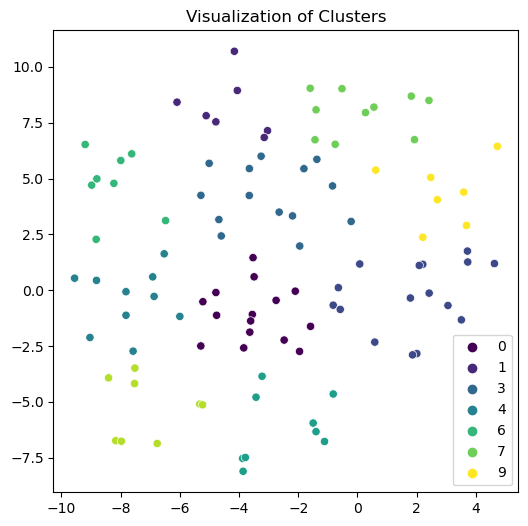

In [32]:
# Visualize the clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=clusters, palette='viridis') # data_tsne or data_pca
plt.title('Visualization of Clusters')
plt.show()

In [34]:
domain_to_cluster_df = domain_embeddings_df.drop(domain_embeddings_df.columns[0:-1], axis=1)

In [35]:
domain_to_cluster_df

,Cluster
google,0
kzhi,7
zemanta,1
shalltry,9
tiktokcdn,7
...,...
brazzers,7
xnxx,6
runbox,5
posteo,3


In [37]:
# Group by the cluster number
grouped_df = domain_to_cluster_df.groupby('Cluster')

# Display each group
for cluster, group in grouped_df:
    print(f"Cluster {cluster}:")
    print(group)
    print()

Cluster 0:
               Cluster
google               0
facebook             0
twitter              0
pinterest            0
reddit               0
linkedin             0
yahoo                0
bing                 0
tumblr               0
stackoverflow        0
wordpress            0
blogger              0
flickr               0
googlekeep           0
aol                  0

Cluster 1:
          Cluster
zemanta         1
lastfm          1
duolingo        1
avaya           1
asana           1
monday          1
zoho            1

Cluster 2:
              Cluster
netflix             2
hulu                2
shopify             2
vimeo               2
soundcloud          2
spotify             2
pandora             2
tidal               2
tunein              2
bandcamp            2
mixcloud            2
lyricsgenius        2
deepmind            2
basecamp            2
xvideos             2
vivaldi             2

Cluster 3:
              Cluster
sina                3
quora               3
g

### Goal
#### Get each domain's cosine similarity with all the categories. Create a dataframea at the end of # of domains x # of cats

In [38]:
def get_matches(domain='youtube',categories=['a','b','c']):
    query_sentence = [domain]

    # Get most similar sentences to the query sentence
    similar_sentences = embedder.compare_sentence_embeddings(query_sentence, categories)
    return similar_sentences

In [39]:
data = {}
for domain in domain_names:
    data[domain] = get_matches(domain=domain,categories=domain_cats)

In [40]:
data

{'google': [('Search Engines', 0.7670707702636719),
  ('Social Media', 0.571632981300354),
  ('Porn', 0.44057026505470276),
  ('Technology & Software', 0.38534441590309143),
  ('Online Shopping', 0.320368230342865),
  ('Streaming Services', 0.29782211780548096),
  ('Cloud Storage', 0.2738596796989441),
  ('Email Services', 0.2667253315448761),
  ('Education & E-Learning', 0.24478381872177124),
  ('Blogging & Website Builders', 0.22223198413848877),
  ('Collaboration & Productivity', 0.20542442798614502)],
 'kzhi': [('Porn', 0.2203359156847),
  ('Technology & Software', 0.2076101303100586),
  ('Social Media', 0.17346073687076569),
  ('Search Engines', 0.17057816684246063),
  ('Email Services', 0.11800241470336914),
  ('Online Shopping', 0.11309760808944702),
  ('Streaming Services', 0.10954175889492035),
  ('Collaboration & Productivity', 0.10822319984436035),
  ('Education & E-Learning', 0.07199907302856445),
  ('Cloud Storage', 0.019927747547626495),
  ('Blogging & Website Builders', 

In [41]:
# Convert the data into a dictionary of dictionaries
domain_dict = {}
for domain, category_scores in data.items():
    domain_dict[domain] = {category: score for category, score in category_scores}

In [42]:
domain_dict

{'google': {'Search Engines': 0.7670707702636719,
  'Social Media': 0.571632981300354,
  'Porn': 0.44057026505470276,
  'Technology & Software': 0.38534441590309143,
  'Online Shopping': 0.320368230342865,
  'Streaming Services': 0.29782211780548096,
  'Cloud Storage': 0.2738596796989441,
  'Email Services': 0.2667253315448761,
  'Education & E-Learning': 0.24478381872177124,
  'Blogging & Website Builders': 0.22223198413848877,
  'Collaboration & Productivity': 0.20542442798614502},
 'kzhi': {'Porn': 0.2203359156847,
  'Technology & Software': 0.2076101303100586,
  'Social Media': 0.17346073687076569,
  'Search Engines': 0.17057816684246063,
  'Email Services': 0.11800241470336914,
  'Online Shopping': 0.11309760808944702,
  'Streaming Services': 0.10954175889492035,
  'Collaboration & Productivity': 0.10822319984436035,
  'Education & E-Learning': 0.07199907302856445,
  'Cloud Storage': 0.019927747547626495,
  'Blogging & Website Builders': -0.026063866913318634},
 'zemanta': {'Porn'

In [43]:
domain_cats

['Search Engines',
 'Social Media',
 'Streaming Services',
 'Cloud Storage',
 'Online Shopping',
 'Technology & Software',
 'Education & E-Learning',
 'Collaboration & Productivity',
 'Email Services',
 'Blogging & Website Builders',
 'Porn']

In [44]:
# Sort the categories
sorted_categories = sorted(domain_cats)
sorted_categories

['Blogging & Website Builders',
 'Cloud Storage',
 'Collaboration & Productivity',
 'Education & E-Learning',
 'Email Services',
 'Online Shopping',
 'Porn',
 'Search Engines',
 'Social Media',
 'Streaming Services',
 'Technology & Software']

In [45]:
final_df = pd.DataFrame(index=data.keys(), columns=sorted_categories)
final_df

,Blogging & Website Builders,Cloud Storage,Collaboration & Productivity,Education & E-Learning,Email Services,Online Shopping,Porn,Search Engines,Social Media,Streaming Services,Technology & Software
google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kzhi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zemanta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shalltry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tiktokcdn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
brazzers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xnxx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Fill the DataFrame with the scores
for domain in domain_names:
    for domain_cat in domain_cats:
        final_df.loc[domain][domain_cat] = domain_dict[domain][domain_cat]

In [47]:
final_df

,Blogging & Website Builders,Cloud Storage,Collaboration & Productivity,Education & E-Learning,Email Services,Online Shopping,Porn,Search Engines,Social Media,Streaming Services,Technology & Software
google,0.222232,0.27386,0.205424,0.244784,0.266725,0.320368,0.44057,0.767071,0.571633,0.297822,0.385344
kzhi,-0.026064,0.019928,0.108223,0.071999,0.118002,0.113098,0.220336,0.170578,0.173461,0.109542,0.20761
zemanta,0.040672,0.125906,0.054053,0.013725,0.044814,0.133127,0.182773,0.158085,0.146254,0.141024,0.137568
shalltry,0.081934,0.102888,0.066293,0.091991,0.117817,0.085087,0.25473,0.158681,0.170118,0.192824,0.180464
tiktokcdn,-0.005928,0.084117,0.086771,0.118768,0.071423,0.105793,0.267021,0.145736,0.224309,0.193552,0.301146
...,...,...,...,...,...,...,...,...,...,...,...
brazzers,0.031841,0.077973,0.11777,0.016974,0.034095,0.090291,0.225615,0.139486,0.227608,0.135583,0.108912
xnxx,0.031183,0.08461,0.052506,0.002519,0.13387,0.118148,0.26928,0.117368,0.173482,0.212704,0.144952
runbox,0.020617,0.186515,0.062455,0.061015,0.15522,0.121128,0.160605,0.081667,0.153862,0.191772,0.167658
posteo,0.072223,0.113303,0.152652,0.103382,0.254897,0.156506,0.228152,0.214224,0.328612,0.196906,0.172891


In [48]:
final_df.to_csv('domain_category_sim_scores.csv')